Import standard.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

Parameters.

In [0]:
Nx                  = 512                  # --- Number of discretization points along x
Ny                  = 512                  # --- Number of discretization points along y
Lx                  = 200                  # --- Dimension of the computational domain along x
Ly                  = 200                  # --- Dimension of the computational domain along y
v                   = 5                    # --- Propagation speed

Space-time discretization.

In [0]:
x, dx = np.linspace(0, Lx, Nx, retstep = True)                                    # --- Discretization points along x
y, dy = np.linspace(0, Ly, Ny, retstep = True)                                    # --- Discretization points along y
X, Y  = np.meshgrid(x, y)  

dt    = 0.25 / (v * np.sqrt((1 / dx) * (1 / dx) + (1 / dy) * (1 / dy)));          # --- Time-step according to the Courant-Friedrichs-Lewy condition
T     = np.floor((2 * np.sqrt(Lx * Lx + Ly * Ly) / v) / dt);                      # --- Total number of time steps
t     = range(0, np.int32(T)) * dt                                                # --- Temporal discretization

Mask defining the aperture.

In [0]:
mask          = np.ones(X.shape)
indMask       = np.where((np.absolute(X - Lx / 2) <= 5) & ((Y <= 90) | (Y >= 110)))
mask[indMask] = 0.

Source size and position.

In [0]:
indxc               = np.floor(Nx / 3) - 1                                        # --- Source index along x
indyc               = np.floor(Ny / 2) - 1                                        # --- Source index along y
xc                  = x[np.int32(indxc)]                                          # --- x-coordinate of the source
yc                  = y[np.int32(indyc)]                                          # --- y-coordinate of the source
indRc               = 50                                                          # --- Total number of source pixels
Rc                  = Lx / indRc                                                  # --- Source radius

Initial step.

In [0]:
alphaSquared        = np.power(dt * v / dx, 2)   # --- CFL number

ind                 = np.where(np.sqrt((X - xc) * (X - xc) + (Y - yc) * (Y - yc)) <= Rc) 

indy                = slice(1, Ny - 1, 1)
indx                = slice(1, Nx - 1, 1)
indxp               = slice(2, Nx,     1)
indxm               = slice(0, Nx - 2, 1)
indyp               = slice(2, Ny,     1)
indym               = slice(0, Ny - 2, 1)

u                   = np.zeros((Ny, Nx))                                          # --- Current source u(x, y, t)
u_old               = np.zeros((Ny, Nx))                                          # --- Source at the previous step u_old(x, y, t)
u_new               = np.zeros((Ny, Nx))                                          # --- New solution u_new(x, y, t)

# --- Source
u_old[ind]          = np.exp(-indRc * ((X[ind] - xc) * (X[ind] - xc) + (Y[ind] - yc) * (Y[ind] - yc)) / Lx)

# --- Solution at first step: time derivative at initial time is zero
u[indy, indx]       = u_old[indy, indx] + 0.5 * alphaSquared * (u[indy, indxm] + u[indym, indx] + u[indy, indxp] + u[indyp, indx] - 4. * u[indy, indx])                                  
u                   = u * mask

Solution at the subsequent steps.

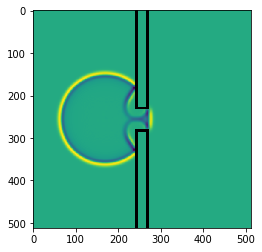

In [0]:
fig = plt.figure()

imSequence = []
for tt in range(0, 200):

    global u_new, u, u_old, indx, indy, indxm, indxp, indym, indyp, mask, indMask
    
    # --- Computing the new solution
    u_new[indy, indx] = 2 * u[indy, indx] - u_old[indy, indx] + alphaSquared * (u[indy, indxm] + u[indym, indx] + u[indy, indxp] + u[indyp, indx] - 4. * u[indy, indx])

    # --- The current solution becomes the old one
    u_old             = u;          
    # --- The new solution becomes the current
    u                 = u_new;          

    u                 = u * mask
    u_old             = u_old * mask

    im = plt.imshow(u, interpolation = 'none')
    plt.contour(mask, colors = 'black', alpha = 0.5)
    imSequence.append([im])

Animation.

In [0]:
anim = animation.ArtistAnimation(fig, imSequence, interval = 50, blit = True)
anim.save('waveEquation2D.mp4')

rc('animation', html = 'jshtml')
anim